In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 - Import and initial analysis of the data

### Initially we import the data set and takes a first look at the data:

In [16]:
# Below we read in the csv-file and makes a copy of it that we can manipulate.
# We also allows two decimals for all float values to increase readability
housing = pd.read_csv("housing.csv")
pd.options.display.float_format = '{:.2f}'.format  
housing.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


In [3]:
# Here we see that we are mainly operating with numerical data, except the
# variable 'ocean_proximity which contains a string indicating distance to the ocean

#In total we have 10 variables that will be further looked into below. 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### We have now taken a brief look into the dataset, where each row contains data for a perticular district.
### From above we can see there is 9 numerical variables:
* **longitude** and **latitude** - Coordinates for each district
* **housing_median_age** - Median age for houses in each district
* **total_rooms** - Total amount of rooms in each district 
* **total_bedrooms** - Total amount of bedrooms in each district
* **population** - District population
* **households** - Number of households in the district
* **median_income** - Median income in each district
* **median_house_value** - Median house value for each district

### and one object (a string):
* **ocean_proximity** - Information about each districts distance to the ocean


### In thiss EDA we want to explore if there is some kind of connections between the prices of houses and the variables/features above.
### 'housing.info()' above showed us that the variable total_bedrooms has some missing data that we need to deal with.

In [4]:
print(housing.isna().sum())
print(housing[housing.total_bedrooms.isna()].head(5))


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77               47.00      1256.00             NaN   
341    -122.17     37.75               38.00       992.00             NaN   
538    -122.28     37.78               29.00      5154.00             NaN   
563    -122.24     37.75               45.00       891.00             NaN   
696    -122.10     37.69               41.00       746.00             NaN   

     population  households  median_income  median_house_value ocean_proximity  
290      570.00      218.00           4.38           161900.00        NEAR BAY  
341      732.00      259.00           1.62            85100.00        NEAR BAY  
538     3741.00     1

### What we'll do with the districts with missing values comes below under section 2. Now we check if there is any duplicate rows in the data that we need to take care of:

In [5]:
housing_duplicates = housing.duplicated().sum()
print(f"There are {housing_duplicates} duplicate rows in this dataset")

There are 0 duplicate rows in this dataset


### There were no duplicates - hence we don't need to remove any data.

### Below we look at a summary for the numerical and categorical columns:

In [6]:
# Numerical information
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [7]:
# Categorical information illustrated as percentages

housing.groupby("ocean_proximity").size()*100/housing.groupby("ocean_proximity").size().sum()


ocean_proximity
<1H OCEAN    44.26
INLAND       31.74
ISLAND        0.02
NEAR BAY     11.09
NEAR OCEAN   12.88
dtype: float64

### Above we see some descriptive statistics over our dataset. From looking at the data we see that the price range for the houses are roughly between 150- 500.000, with a mean value of just over 200.000. The majority of the districts, 44% are located <1h from the ocean, 32% are on the inland whereas 11 and 13% are locad near bay and ocean respectively. 0.02% are located on an island, such a small portion that it perhaps can be removed.

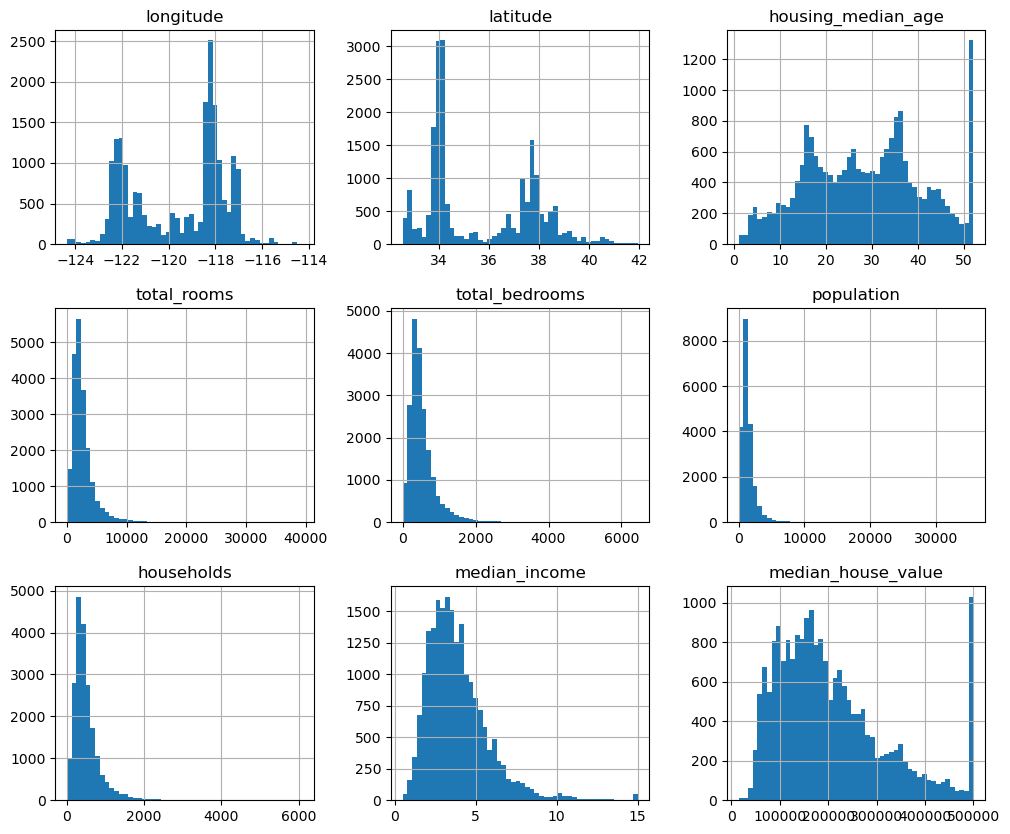

In [8]:
housing.hist(bins = 50, figsize=(12, 10));


### Plotted above is histograms over our numerical features. The coordinates show that certain longitudes (e.g. -122, -118) and latitudes (e.g. 34, 38) contains more districts (probably in the (-118, 34) and (-122, 38) combinations). Both median_house_value and housing_median_age has unusually looking peaks at the end of the histograms - this probably due to a limit set in the data -> E.g. All districts where median age higher than 52years are set to 52years in the data, and all districts with houses more expensive than 500.000 were set to 500.000.

### Below we find that:
* 965 districts (4,8% of the total) have a median value >= 500.000 - Here we find 3,75% of the total population
* 1273 districts (6,2% of the total) have a house median age > 51 - Here we find 4% of the population
* 180 districts (0,87% of the total) have a median value >= 500.000 and median age >= 52 years - Here we find 0,54% of the population

### Perhaps this isn't of any relevance for this analyze. We'll see later on what happens. 

In [9]:
# Cases when median house price >= 500.000 followed by percentage of total
print(housing[housing["median_house_value"]>499999])
print(housing[housing["median_house_value"]>499999]["population"].sum()/housing["population"].sum())

# Cases when median house age >= 52 years followed by percentage of total
print(housing[housing["housing_median_age"]>51])
print(housing[housing["housing_median_age"]>51]["population"].sum()/housing["population"].sum())

# Cases when median house price >= 500.000 AND median house age >= 52 years followed by percentage of total
print(housing[(housing["median_house_value"]>499999) & (housing["housing_median_age"]>51)])
print(housing[(housing["median_house_value"]>499999) & (housing["housing_median_age"]>51)]["population"].sum()/housing["population"].sum())





       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80               52.00       249.00           78.00   
459      -122.25     37.87               52.00       609.00          236.00   
493      -122.24     37.86               52.00      1668.00          225.00   
494      -122.24     37.85               52.00      3726.00          474.00   
509      -122.23     37.83               52.00      2990.00          379.00   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14               35.00      1503.00          263.00   
20426    -118.69     34.18               11.00      1177.00          138.00   
20427    -118.80     34.19                4.00     15572.00         2222.00   
20436    -118.69     34.21               10.00      3663.00          409.00   
20443    -118.85     34.27               50.00       187.00           33.00   

       population  households  median_income  media

### Below we look a little into what happens when we group the data based on the median house values. 
### Here we also plots median income, population and ocean proximity for these intervals to get a better feel of the data.

In [10]:
# creates a price interval array (p_i) for easy changing and plotting below.
p_i = np.array([[0, 150000], [150000, 250000], [250000, 400000], [400000, 450000], [450000, 1000000]])

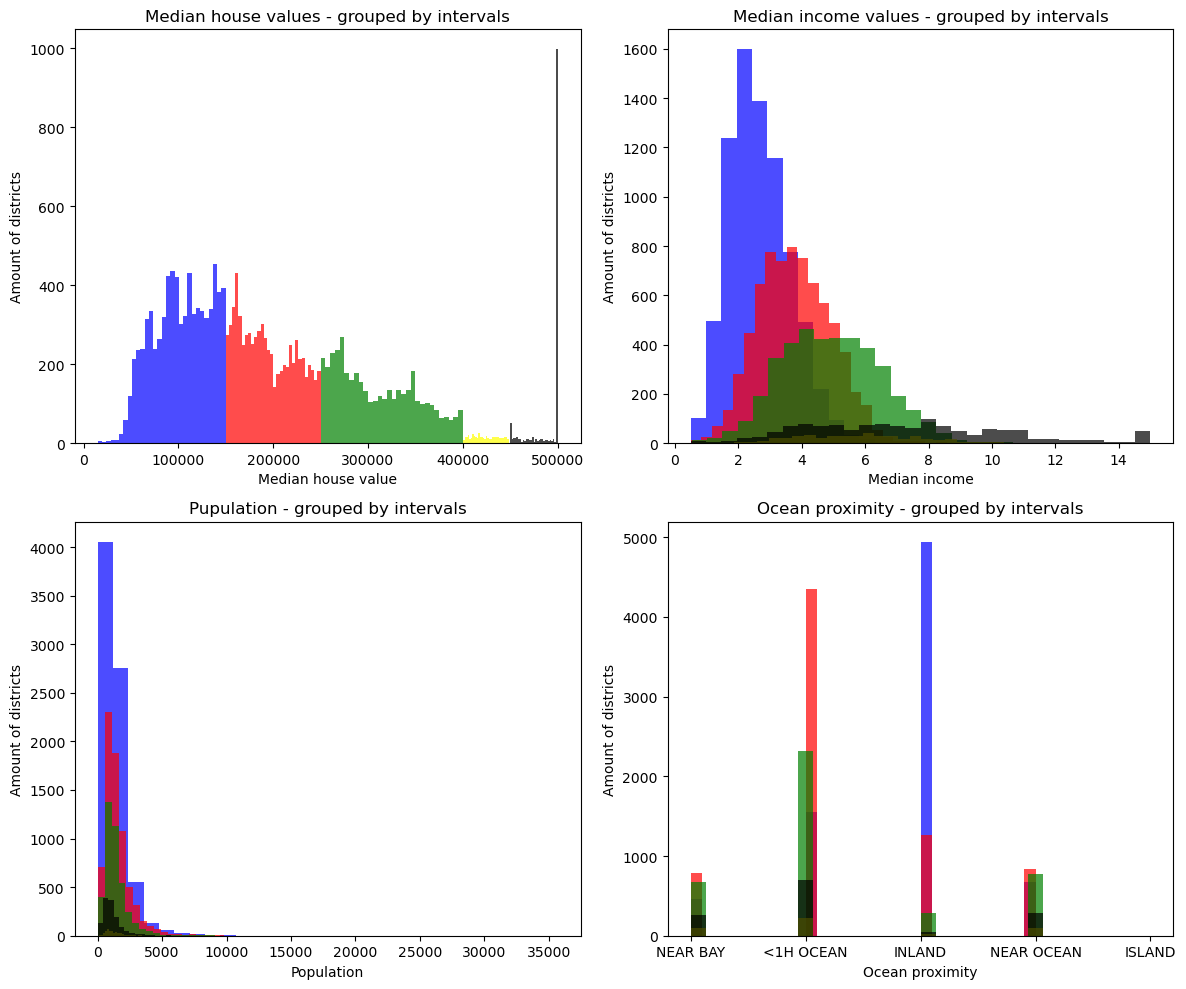

In [11]:
# extracts five groups of houses based on median house values set above.
filtered_housing_1 = housing[(housing["median_house_value"] > p_i[0,0]) & (housing["median_house_value"] <= p_i[0,1])] # cheaper homes
filtered_housing_2 = housing[(housing["median_house_value"] > p_i[1,0]) & (housing["median_house_value"] <= p_i[1,1])] # less cheaper homes
filtered_housing_3 = housing[(housing["median_house_value"] > p_i[2,0]) & (housing["median_house_value"] <= p_i[2,1])] # more expensive homes
filtered_housing_4 = housing[(housing["median_house_value"] > p_i[3,0]) & (housing["median_house_value"] < p_i[3,1])] # even more expensive homes
filtered_housing_5 = housing[(housing["median_house_value"] >= p_i[4,0])]                                             # most expensive homes

# Generates a 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rader och 2 kolumner

# Generates histogram with median house value for our five groups
axes[0, 0].hist(filtered_housing_1["median_house_value"], bins=30, alpha=0.7, color="blue", histtype='stepfilled')
axes[0, 0].hist(filtered_housing_2["median_house_value"], bins=30, alpha=0.7, color="red", histtype='stepfilled')
axes[0, 0].hist(filtered_housing_3["median_house_value"], bins=30, alpha=0.7, color="green", histtype='stepfilled')
axes[0, 0].hist(filtered_housing_4["median_house_value"], bins=30, alpha=0.7, color="yellow", histtype='stepfilled')
axes[0, 0].hist(filtered_housing_5["median_house_value"], bins=30, alpha=0.7, color="black", histtype='stepfilled')
axes[0, 0].set_title("Median house values - grouped by intervals")
axes[0, 0].set_xlabel("Median house value")
axes[0, 0].set_ylabel("Amount of districts")

# Generates histogram with median income for our five groups
axes[0, 1].hist(filtered_housing_1["median_income"], bins=30, alpha=0.7, color="blue", histtype='stepfilled')
axes[0, 1].hist(filtered_housing_2["median_income"], bins=30, alpha=0.7, color="red", histtype='stepfilled')
axes[0, 1].hist(filtered_housing_3["median_income"], bins=30, alpha=0.7, color="green", histtype='stepfilled')
axes[0, 1].hist(filtered_housing_4["median_income"], bins=30, alpha=0.7, color="yellow", histtype='stepfilled')
axes[0, 1].hist(filtered_housing_5["median_income"], bins=30, alpha=0.7, color="black", histtype='stepfilled')
axes[0, 1].set_title("Median income values - grouped by intervals")
axes[0, 1].set_xlabel("Median income")
axes[0, 1].set_ylabel("Amount of districts")

# Generates histogram with median population for our five groups
axes[1, 0].hist(filtered_housing_1["population"], bins=30, alpha=0.7, color="blue", histtype='stepfilled')
axes[1, 0].hist(filtered_housing_2["population"], bins=30, alpha=0.7, color="red", histtype='stepfilled')
axes[1, 0].hist(filtered_housing_3["population"], bins=30, alpha=0.7, color="green", histtype='stepfilled')
axes[1, 0].hist(filtered_housing_4["population"], bins=30, alpha=0.7, color="yellow", histtype='stepfilled')
axes[1, 0].hist(filtered_housing_5["population"], bins=30, alpha=0.7, color="black", histtype='stepfilled')
axes[1, 0].set_title("Pupulation - grouped by intervals")
axes[1, 0].set_xlabel("Population")
axes[1, 0].set_ylabel("Amount of districts")

# Generates histogram with median house age for our five groups
axes[1, 1].hist(filtered_housing_1["ocean_proximity"], bins=30, alpha=0.7, color="blue", histtype='stepfilled')
axes[1, 1].hist(filtered_housing_2["ocean_proximity"], bins=30, alpha=0.7, color="red", histtype='stepfilled')
axes[1, 1].hist(filtered_housing_3["ocean_proximity"], bins=30, alpha=0.7, color="green", histtype='stepfilled')
axes[1, 1].hist(filtered_housing_4["ocean_proximity"], bins=30, alpha=0.7, color="yellow", histtype='stepfilled')
axes[1, 1].hist(filtered_housing_5["ocean_proximity"], bins=30, alpha=0.7, color="black", histtype='stepfilled')
axes[1, 1].set_title("Ocean proximity - grouped by intervals")
axes[1, 1].set_xlabel("Ocean proximity")
axes[1, 1].set_ylabel("Amount of districts")

plt.tight_layout()


### When using intervals for mean house value to divide the data and plot the outcome, we get the histograms above.
### One can not tell much about the observation, other than it seems to be increasing median income from the blue group (med. house value in [0,150.000]) to red (med. house value in [150.000, 250.000] to the highest income in the green group (med. house value in [250.000, 400.000]. For the last two groups (where med. house value in [400.000, 450.000] and [450.000, 1000.000] respectively) the income doesn't immediately tell seem to correspond to more valuable homes. We can again here note the big peak of homes with median house values >= 500.000. 

### When looking at the ocean proximity - it seems to be so that districts with shorter distance to the ocean tend to have a higher price. Summary are printed below:

In [12]:
# Short addition to above
print(f"For districts with mean value of houses between: {p_i[0,0]} to {p_i[0,1]}, we have:") 
print(f"The mean median house value is {filtered_housing_1["median_house_value"].mean()}")
print(f"The mean median income is {filtered_housing_1["median_income"].mean()}")
print(f"{100*(filtered_housing_1["population"].sum()/housing["population"].sum())} of the population lives here")
# Below i checked that the right sum of population 
# print(filtered_housing_1["population"].sum() + filtered_housing_2["population"].sum() + filtered_housing_3["population"].sum() + filtered_housing_4["population"].sum() + filtered_housing_5["population"].sum())
# print(housing["population"].sum())
print("---------------------------")
print(f"For districts with mean value of houses between: {p_i[1,0]} to {p_i[1,1]}, we have:") 
print(f"The mean median house value is {filtered_housing_2["median_house_value"].mean()}")
print(f"The mean median income is {filtered_housing_2["median_income"].mean()}")
print(f"{100*(filtered_housing_2["population"].sum()/housing["population"].sum())} of the population lives here")
print("---------------------------")
print(f"For districts with mean value of houses between: {p_i[2,0]} to {p_i[2,1]}, we have:") 
print(f"The mean median house value is {filtered_housing_3["median_house_value"].mean()}")
print(f"The mean median income is {filtered_housing_3["median_income"].mean()}")
print(f"{100*(filtered_housing_3["population"].sum()/housing["population"].sum())} of the population lives here")
print("---------------------------")
print(f"For districts with mean value of houses between: {p_i[3,0]} to {p_i[3,1]}, we have:") 
print(f"The mean median house value is {filtered_housing_4["median_house_value"].mean()}")
print(f"The mean median income is {filtered_housing_4["median_income"].mean()}")
print(f"{100*(filtered_housing_4["population"].sum()/housing["population"].sum())} of the population lives here")
print("---------------------------")
print(f"For districts with mean value of houses between: {p_i[4,0]} to {p_i[4,1]}, we have:") 
print(f"The mean median house value is {filtered_housing_5["median_house_value"].mean()}")
print(f"The mean median income is {filtered_housing_5["median_income"].mean()}")
print(f"{100*(filtered_housing_5["population"].sum()/housing["population"].sum())} of the population lives here")




For districts with mean value of houses between: 0 to 150000, we have:
The mean median house value is 102244.56640419948
The mean median income is 2.6725826509186352
35.54591079279882 of the population lives here
---------------------------
For districts with mean value of houses between: 150000 to 250000, we have:
The mean median house value is 194531.94252555954
The mean median income is 3.790967463387676
37.708205876994775 of the population lives here
---------------------------
For districts with mean value of houses between: 250000 to 400000, we have:
The mean median house value is 310544.1555225359
The mean median income is 4.952861713719662
19.79633836632923 of the population lives here
---------------------------
For districts with mean value of houses between: 400000 to 450000, we have:
The mean median house value is 423610.0
The mean median income is 5.843230444444444
1.9288086673029288 of the population lives here
---------------------------
For districts with mean value of 

### As a next step, we will add more variables/features to the data that we already have, deal with missing values and try to gain some better insight what this data can tell us about what's driving price och homes.

## Two main hypothesises from observing the data is that:
* High median value on houses should lead to higher median income
* High median value on houses should depend on ocean proximity - Closer distance to the ocean should lead to higher price/value.

### Only calculations regarding correlance between 'median house value' will be performed, no further analysis such statistical models such as hypothesis testing and similar will be performed.

# 2 - Data cleaning and manipulation

### Above we found some missing values. Either can we remove these, or deal with them in another way. I choose instead of removing these districts, we use the mean ratio: total_bedrooms/total_rooms for all the districts with no missing data, based on the distance to the ocean. Note that a housing is a copy of the data - so I also makes a copy where I remove the nan-values to compare the outcome.

### I will make two simple cases here, and one a bit more complex. I will make:
* 1 one copy of the dataframe where only the nan-values are removed - housing_cleaned
* 2 one copy of the dataframe where only the nan-values are replaced as above - housing_filled
* 3 one copy of the dataframe where the nan-values are replaced as above and other changes are tried - housing_filled_filtered

### Two of these df will not be filtered in any way - for the last one I'll remove values that doesn't seem to contribute in a good way, or that are not making good sense. 
### Below we begin with eliminating nan-values for our first data frame - housing_cleaned.


### OBS: Later in the analyze  I noticed that the non-numerical cathegory "ocean proximity" couldn't be included when looking at coorelations.
### Therefore we start over from this step and try to convert this and re-do the steps below. ALSO we create copies of our df:s in case we wan't to to more changes for comparisons. Below we see that in overall, inland seems to be the cheapest regian to live in, while the closer you live to the ocean the higher house value. 
## We here use 'inland', '<1h ocean',..., 'Island' as keys with 0, 1,..., 3 as values, and then map these over the df:s.

In [17]:
print(housing.groupby("ocean_proximity")["median_house_value"].mean())
# Adds 0,1,...,4 as values for keys of ocean proximity
oc_prox = {"INLAND": 0, "<1H OCEAN": 1 , "NEAR OCEAN": 2, "NEAR BAY": 3 , "ISLAND": 4}
housing["ocean_proximity_num"] = housing["ocean_proximity"].map(oc_prox)
# housing["ocean_proximity_num"] = housing["ocean_proximity"].map(oc_prox)
# housing["ocean_proximity_num"] = housing["ocean_proximity"].map(oc_prox)
print(housing[["ocean_proximity_num", "ocean_proximity"]])

#housing df now has an numerical column for ocean proximity
housing.info()

ocean_proximity
<1H OCEAN    240084.29
INLAND       124805.39
ISLAND       380440.00
NEAR BAY     259212.31
NEAR OCEAN   249433.98
Name: median_house_value, dtype: float64
       ocean_proximity_num ocean_proximity
0                        3        NEAR BAY
1                        3        NEAR BAY
2                        3        NEAR BAY
3                        3        NEAR BAY
4                        3        NEAR BAY
...                    ...             ...
20635                    0          INLAND
20636                    0          INLAND
20637                    0          INLAND
20638                    0          INLAND
20639                    0          INLAND

[20640 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             2

## Now we begin to analyze our data through data modeling/cleaning - so we make a copy of housing:

In [19]:
# Makes a copy of all valid data (all data with no nan) and double checks that the data frames are equal before making any changes.
housing_cleaned = housing.copy()
housing_filled = housing.copy()
print(housing_cleaned.equals(housing))

# Removes nan-values in housing_no_nans - now this dataframe won't be changed any more
housing_cleaned.dropna(inplace = True)

True


### Below we begin to create housing_filled - firstly we find the indexes of the missing values, and where they are located based on ocean proximity:

In [20]:
# 207 values are missing

# keeps indexes of these to check after manipulating the data
missing_vals_idx = housing_filled[housing_filled['total_bedrooms'].isna()].index
print(missing_vals_idx)

# Check which category the missing data are located - Also works with .loc.... why?
housing_filled.iloc[missing_vals_idx].groupby("ocean_proximity").size()
#housing.describe()
#housing.groupby("ocean_proximity").size()

Index([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,  1493,
       ...
       19932, 19959, 20046, 20069, 20125, 20267, 20268, 20372, 20460, 20484],
      dtype='int64', length=207)


ocean_proximity
<1H OCEAN     102
INLAND         55
NEAR BAY       20
NEAR OCEAN     30
dtype: int64

### Only 207 values where missing, probably we could remove these - but for my own training we keep these and base the estimated values on ocean proximity. Now we add a feature: bed_room_ratio for all districts with no nan-values as b-ratio = total bedrooms / total rooms.
### Then we "connect" this ratio to ocean proximity to get mean value of this ratio.

In [22]:
# Copies the part of the dataframe where no nan occurs
valid_districts = housing_filled[housing_filled['total_bedrooms'].notna()].copy()

# Add a feature: beed room ratio (bed rooms / total nr rooms) for all ok data
valid_districts["bed_room_ratio"] = valid_districts['total_bedrooms'] / valid_districts['total_rooms']

# Group this data by ocean proximity to ocean and gives mean value for this ratio (brr-bed room ratio) for each group - saved as a pd-SERIES
brr_ocean_prox = valid_districts.groupby("ocean_proximity")["bed_room_ratio"].mean()
#print(type(brr_ocean_prox))

print(f"Our bed room ratio (bed rooms / total rooms) for each ocean proximity is: \n {brr_ocean_prox}")
#print(valid_districts)
#print(brr_ocean_prox)


Our bed room ratio (bed rooms / total rooms) for each ocean proximity is: 
 ocean_proximity
<1H OCEAN    0.22
INLAND       0.20
ISLAND       0.27
NEAR BAY     0.21
NEAR OCEAN   0.22
Name: bed_room_ratio, dtype: float64


### Now we add the ocean proximity based bed room ratio to housing - Then calculate total bedrooms where missing based on this ratio and add these values to df housing_filled - I believe this way of estimating the missing values are better than just using the average overall ratio.

In [23]:
# First i added a feature to housing_filled df, mean value depending on ocean proximity with map() maps over ocean_prox
# like following:
#housing_filled['bed_room_ratio_mean'] = housing_filled['ocean_proximity'].map(brr_ocean_prox)

# BUT I changed my mind and instead created a temporary series so the different data frames i Use still have the same columns.
bed_room_ratio_mean = housing_filled['ocean_proximity'].map(brr_ocean_prox)
print(bed_room_ratio_mean)
# print(type(bed_room_ratio_mean))

# Inserts total_bedrooms in housing where missing. This is done by multiplying total rooms with beed room mean average with respect to ocean proximity
#housing_filled['total_bedrooms'] = housing_filled['total_bedrooms'].fillna(housing_filled['total_rooms'] * housing_filled['bed_room_ratio_mean'])

housing_filled['total_bedrooms'] = housing_filled['total_bedrooms'].fillna(housing_filled['total_rooms'] * bed_room_ratio_mean)

housing_filled.iloc[missing_vals_idx]


0       0.21
1       0.21
2       0.21
3       0.21
4       0.21
        ... 
20635   0.20
20636   0.20
20637   0.20
20638   0.20
20639   0.20
Name: ocean_proximity, Length: 20640, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_num
290,-122.16,37.77,47.00,1256.00,267.99,570.00,218.00,4.38,161900.00,NEAR BAY,3
341,-122.17,37.75,38.00,992.00,211.66,732.00,259.00,1.62,85100.00,NEAR BAY,3
538,-122.28,37.78,29.00,5154.00,1099.70,3741.00,1273.00,2.58,173400.00,NEAR BAY,3
563,-122.24,37.75,45.00,891.00,190.11,384.00,146.00,4.95,247100.00,NEAR BAY,3
696,-122.10,37.69,41.00,746.00,159.17,387.00,161.00,3.91,178400.00,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.00,3620.00,793.14,3171.00,779.00,3.34,220500.00,NEAR OCEAN,2
20268,-119.18,34.19,19.00,2393.00,524.31,1938.00,762.00,1.70,167400.00,NEAR OCEAN,2
20372,-118.88,34.17,15.00,4260.00,929.26,1701.00,669.00,5.10,410700.00,<1H OCEAN,1
20460,-118.75,34.29,17.00,5512.00,1202.36,2734.00,814.00,6.61,258100.00,<1H OCEAN,1


### Now we have df:s housing_cleaned and _filled respectively ready. Now we'll insert some additional features/variables before creating the filtered df where we focus more on eliminating data.

### Below we add:
* Population per household - by   $\frac{population}{households}$ 
* Bedrooms per household - by     $\frac{total bedrooms}{households}$
* Rooms per household - by        $\frac{total rooms}{households}$

### Then we copy housing_filled which we will work on with a bit more.

In [24]:
# Adding population per household:
housing_cleaned["population_per_household"] = housing_cleaned["population"]/housing_cleaned["households"]
housing_filled["population_per_household"] = housing_filled["population"]/housing_filled["households"]

# Adding bedrooms per household:
housing_cleaned["bedrooms_per_household"] = housing_cleaned["total_bedrooms"]/housing_cleaned["households"]
housing_filled["bedrooms_per_household"] = housing_filled["total_bedrooms"]/housing_filled["households"]

# Adding rooms per household:
housing_cleaned["rooms_per_household"] = housing_cleaned["total_rooms"]/housing_cleaned["households"]
housing_filled["rooms_per_household"] = housing_filled["total_rooms"]/housing_filled["households"]
# creates copy of non nan-value df, this will be filtered.
housing_filled_filtered = housing_filled.copy()

#Now housing_filled is complete. Only housing_ filled _ filtered will have more changes to the actual data
# housing_cleaned.info()
# housing_filled.info()
# housing_filled_filtered.info()
# housing_filled_filtered.describe()


### After looking at the housing_... .describe() above, some extreme values e.g. population_per_household maximum = 1243,33 and minimum bedrooms and rooms per house are 0,33 and 0,85 respectively. We look into these districts and probably will remove them. We look closer at these values below.

### My first step though is to remove the data where rooms_per_household < bedrooms_per_household - This since a house with e.g. 3 bedrooms must consist of atleast 3 rooms.

In [25]:
filtered_rows = housing_filled_filtered[housing_filled_filtered["rooms_per_household"] < housing_filled_filtered["bedrooms_per_household"]]
print(filtered_rows)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, ocean_proximity_num, population_per_household, bedrooms_per_household, rooms_per_household]
Index: []


### There were no such cases. Below we look at some extreme values - housing districts with the smallest and largest amount of rooms:

In [26]:


# Here we want to check the largest/smallest room numbers to see if some outlayers could be removed.
filter = ["population_per_household", "rooms_per_household", "population", "bedrooms_per_household", "median_house_value"]

#housing_filled_filtered.sort_values("rooms_per_household", ascending=False).head(10)
# Above equals to:
print(housing_filled_filtered.nlargest(8, "rooms_per_household")[filter])
print(housing_filled_filtered.nsmallest(8, "rooms_per_household")[filter])

       population_per_household  rooms_per_household  population  \
1914                       2.73               141.91       30.00   
1979                       2.40               132.53       36.00   
12447                      1.84                62.42       83.00   
1913                       2.33                61.81      112.00   
11862                      1.75                59.88       28.00   
1912                       2.08                56.27       54.00   
9676                       2.37                52.85      265.00   
11707                      2.33                52.69       98.00   

       bedrooms_per_household  median_house_value  
1914                    25.64           500001.00  
1979                    34.07           162500.00  
12447                   14.11            87500.00  
1913                    11.00           437500.00  
11862                   15.31            67500.00  
1912                    10.15           206300.00  
9676                   

### Above we see that the districts with highest number of average rooms have two large values that are much above the third on the list - hence we remove these two by only allowing 70 rooms as max (which only excludes these two).

### For the districts with the lowest number of average rooms, I choose to only accept data where the minimum value are 1. So:
* Districts with average rooms > 70 - removed
* Districts with average rooms < 1 - removed

In [27]:
housing_filled_filtered = housing_filled_filtered[(housing_filled_filtered["rooms_per_household"] >= 1) & (housing_filled_filtered["rooms_per_household"] <= 70)]
print(housing_filled_filtered.nlargest(3, "rooms_per_household")[filter])
print(housing_filled_filtered.nsmallest(3, "rooms_per_household")[filter])
#housing_filled_filtered.describe()

       population_per_household  rooms_per_household  population  \
12447                      1.84                62.42       83.00   
1913                       2.33                61.81      112.00   
11862                      1.75                59.88       28.00   

       bedrooms_per_household  median_house_value  
12447                   14.11            87500.00  
1913                    11.00           437500.00  
11862                   15.31            67500.00  
       population_per_household  rooms_per_household  population  \
3126                       3.00                 1.00        6.00   
14818                      2.52                 1.13       58.00   
17820                      1.74                 1.13      120.00   

       bedrooms_per_household  median_house_value  
3126                     1.00           137500.00  
14818                    0.61           125000.00  
17820                    1.04           187500.00  


 
### Now we've removed some outlayers with respect to average number of rooms. Let's check the average number of bedrooms:


In [28]:
print(housing_filled_filtered.nsmallest(5, "bedrooms_per_household")[filter])
print(housing_filled_filtered.nlargest(5, "bedrooms_per_household")[filter])


       population_per_household  rooms_per_household  population  \
20248                      3.22                 2.89       29.00   
13606                      6.12                 3.75       49.00   
12649                      8.22                 2.22       74.00   
4591                       3.22                 2.10     3795.00   
3125                       1.33                 3.00        8.00   

       bedrooms_per_household  median_house_value  
20248                    0.33           275000.00  
13606                    0.38           250000.00  
12649                    0.44            80000.00  
4591                     0.46           162500.00  
3125                     0.50           275000.00  
       population_per_household  rooms_per_household  population  \
11862                      1.75                59.88       28.00   
12447                      1.84                62.42       83.00   
9676                       2.37                52.85      265.00   
1240   

### By looking at bedrooms_per_household, the only values that could be considered to be removed are the ones where amount < 1, but I don't do this since I assume that some houses have rooms that people sleep in that's not labeled correctly here in the data.

In [29]:
print(housing_filled_filtered.nsmallest(5, "population_per_household"))#[filter])
print(housing_filled_filtered.nlargest(10, "population_per_household"))#[filter])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
11849    -121.00     39.75                8.00      1116.00          214.00   
5342     -118.44     34.04               16.00        18.00            6.00   
19522    -121.00     37.65               17.00       484.00          202.00   
19427    -121.00     37.71               52.00       102.00           23.00   
4623     -118.31     34.06               36.00       369.00          147.00   

       population  households  median_income  median_house_value  \
11849       27.00       39.00           2.59            83000.00   
5342         3.00        4.00           0.54           350000.00   
19522      198.00      204.00           0.68           187500.00   
19427       35.00       33.00           2.25           175000.00   
4623       145.00      136.00           0.88           450000.00   

      ocean_proximity  ocean_proximity_num  population_per_household  \
11849          INLAND                    0  

### Above, the smallest population per households simply could indicate an area where not many people live in yet - recently built or so...

### The largest population on the other hand are harder to interpret. The ten largest average households has populations of 21-1200, where the values descend in a good order from the 10th value. The ascending values from the tenth value however increases in a wierd looking way - so I here chose to exclude the 1-9 districts with the largest populations per households.

In [30]:
housing_filled_filtered = housing_filled_filtered[(housing_filled_filtered["population_per_household"] < 22)]
print(housing_filled_filtered.nlargest(3, "population_per_household"))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5986     -117.71     34.10               52.00       567.00          152.00   
20352    -119.09     34.22                8.00        40.00           10.00   
14756    -116.97     32.56               23.00      1262.00          294.00   

       population  households  median_income  median_house_value  \
5986      2688.00      126.00           1.88           212500.00   
20352      309.00       16.00           4.02            52500.00   
14756     5176.00      275.00           2.56           153300.00   

      ocean_proximity  ocean_proximity_num  population_per_household  \
5986           INLAND                    0                     21.33   
20352      NEAR OCEAN                    2                     19.31   
14756      NEAR OCEAN                    2                     18.82   

       bedrooms_per_household  rooms_per_household  
5986                     1.21                 4.50  
20352          

### Lastly we'll take a deeper look into the wierd peak of houses with prices > 500.000.

In [31]:
# Median house values > 500.000
print(f"Number of districts with median house values higher than 500.000: {housing_filled_filtered[(housing_filled_filtered["median_house_value"] > 500000)].shape[0]}")
# Median house values > 499.999
print(f"Number of districts with median house values higher than 499.999: {housing_filled_filtered[(housing_filled_filtered["median_house_value"] > 499999)].shape[0]}")
# Median house values > 499.000
print(f"Number of districts with median house values higher than 499.000: {housing_filled_filtered[(housing_filled_filtered["median_house_value"] > 499000)].shape[0]}")

Number of districts with median house values higher than 500.000: 963
Number of districts with median house values higher than 499.999: 990
Number of districts with median house values higher than 499.000: 991


### I chose to remove all districts with median house values >= 500.000 since I believe they in fact are more expensive in reality (atleast the majority) - meaning that they will impact this analyze in a negative way - e.g. a house valued at 900.000 has most likely some values in its' features/variables that probably is different when comparing to a 500.000 house in the exact same position. 

In [32]:
housing_filled_filtered = housing_filled_filtered[(housing_filled_filtered["median_house_value"] < 500000)]
print(housing_filled_filtered.nlargest(10, "median_house_value"))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10652    -117.77     33.55               28.00      2024.00          297.00   
1639     -122.18     37.89               18.00      4845.00          735.00   
18083    -122.06     37.33               29.00      1945.00          269.00   
4237     -118.31     34.13               40.00      2822.00          443.00   
6915     -117.99     33.95               30.00      2217.00          284.00   
5753     -118.27     34.18               52.00      3034.00          406.00   
4114     -118.41     34.14               33.00       778.00          143.00   
5889     -118.34     34.15               40.00      3068.00          756.00   
14376    -117.25     32.72               33.00      1677.00          228.00   
18054    -121.97     37.25               21.00      2775.00          389.00   

       population  households  median_income  median_house_value  \
10652      617.00      274.00           6.79           499100.

### Below I'll calculate the correlations between our features in the data. This didn't work with the "ocean proximity" feature - so I'll exclude this and only for our dataframes housing_cleaned, housing_filled and housing_filled_filtered.

In [33]:
#housing_filled.corr()
n_data_housing_cleaned = housing_cleaned.select_dtypes(include=['number'])
n_data_housing_filled = housing_filled.select_dtypes(include=['number'])
n_data_housing_filled_filtered = housing_filled_filtered.select_dtypes(include=['number'])

corr_housing_cleaned = n_data_housing_cleaned.corr()['median_house_value'].drop('median_house_value')
corr_housing_filled = n_data_housing_filled.corr()['median_house_value'].drop('median_house_value')
corr_housing_filled_filtered = n_data_housing_filled_filtered.corr()['median_house_value'].drop('median_house_value')

print(f"The correlation matrix for the housing-data with only 'nan'-values dropped: \n {corr_housing_cleaned.sort_values(ascending=True)}")
print(f"The correlation matrix for the housing-data with 'nan'-values filled: \n {corr_housing_filled.sort_values(ascending=True)}")
print(f"The correlation matrix for the housing-data with only 'nan'-values filled and other values removed as above: \n {corr_housing_filled_filtered.sort_values(ascending=True)}")


The correlation matrix for the housing-data with only 'nan'-values dropped: 
 latitude                   -0.14
bedrooms_per_household     -0.05
longitude                  -0.05
population                 -0.03
population_per_household   -0.02
total_bedrooms              0.05
households                  0.06
housing_median_age          0.11
total_rooms                 0.13
rooms_per_household         0.15
ocean_proximity_num         0.40
median_income               0.69
Name: median_house_value, dtype: float64
The correlation matrix for the housing-data with 'nan'-values filled: 
 latitude                   -0.14
longitude                  -0.05
bedrooms_per_household     -0.04
population                 -0.02
population_per_household   -0.02
total_bedrooms              0.05
households                  0.07
housing_median_age          0.11
total_rooms                 0.13
rooms_per_household         0.15
ocean_proximity_num         0.40
median_income               0.69
Name: median_hous

## Below is a histogram over the features with highest correlance with house value, together with a scatter-plot for the two variables with highest correlance:

Here we have a histogram over the median house values for: housing_cleaned, housing_filled and housing_filled_filtered in that order, 
 with the four features with highest correlance


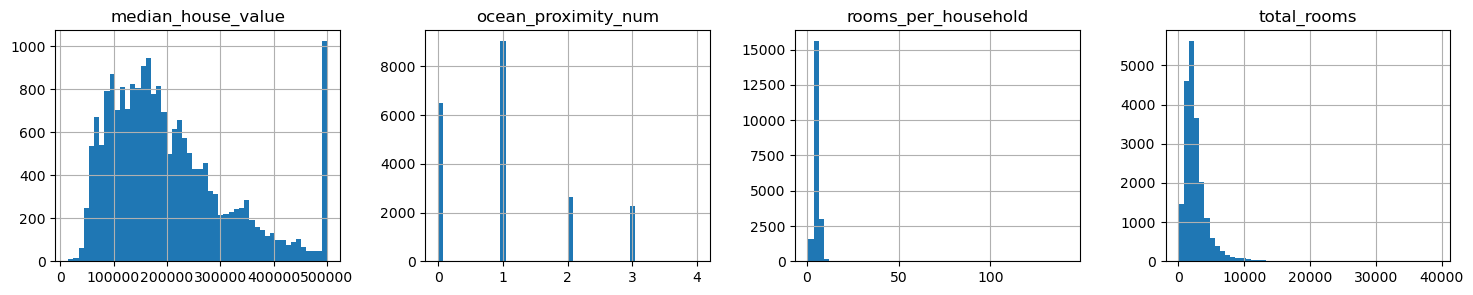

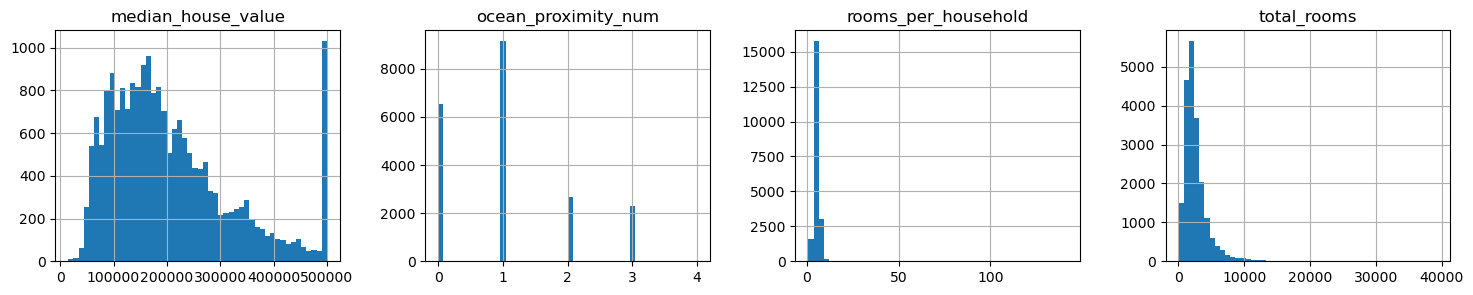

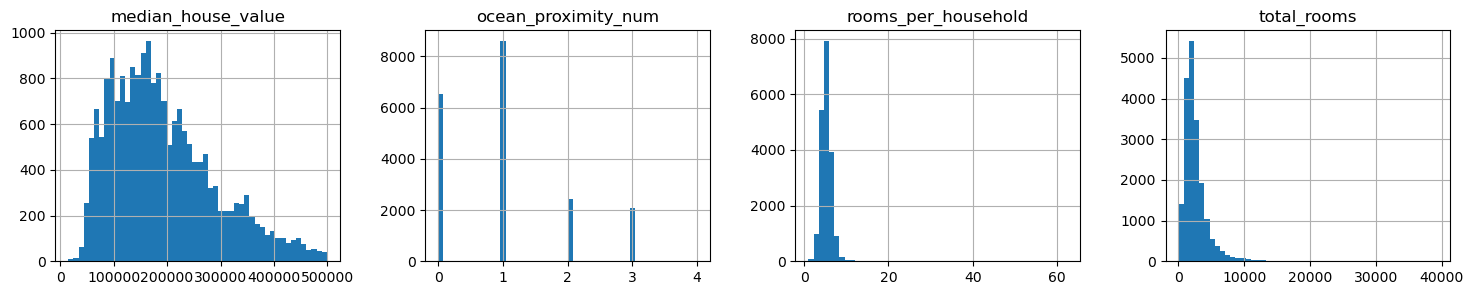

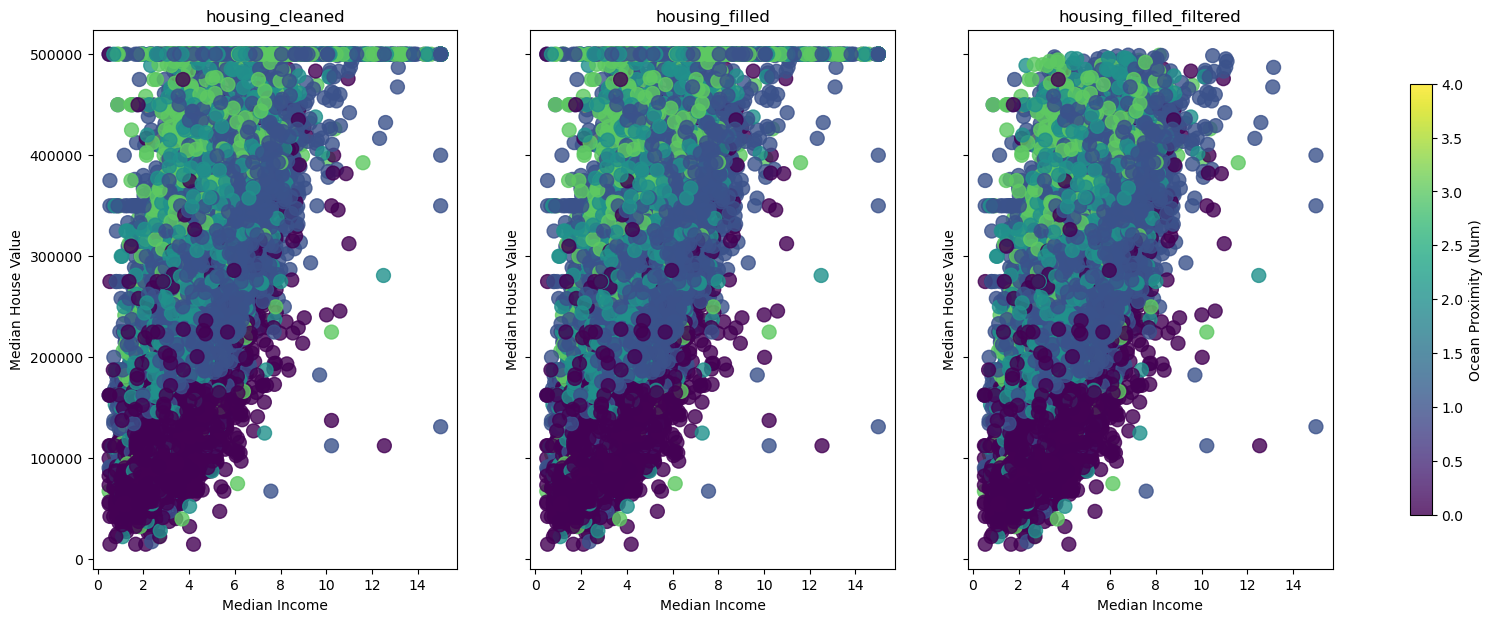

In [34]:
print(f"Here we have a histogram over the median house values for: housing_cleaned, housing_filled and housing_filled_filtered in that order, \n with the four features with highest correlance")
housing_cleaned[["median_house_value", "ocean_proximity_num", "rooms_per_household", "total_rooms"]].hist(bins=50, figsize=(18,3), layout=(1, 4))
housing_filled[["median_house_value", "ocean_proximity_num", "rooms_per_household", "total_rooms"]].hist(bins=50, figsize=(18,3), layout=(1, 4))
housing_filled_filtered[["median_house_value", "ocean_proximity_num", "rooms_per_household", "total_rooms"]].hist(bins=50, figsize=(18,3), layout=(1, 4))

dataframes = [housing_cleaned, housing_filled, housing_filled_filtered]
titles = ["housing_cleaned", "housing_filled", "housing_filled_filtered"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)
for ax, df, title in zip(axes, dataframes, titles):
    scatter = ax.scatter(
        df["median_income"],
        df["median_house_value"],
        c=df["ocean_proximity_num"],
        cmap="viridis",
        s=100,
        alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Median Income")
    ax.set_ylabel("Median House Value")
cbar = fig.colorbar(scatter, ax=axes, orientation="vertical", shrink=0.8)
cbar.set_label("Ocean Proximity (Num)")

plt.show()


## In the scatter plot above, one can see that there is a similar correlance between house value and median income and ocean proximity.

## The efforts so far haven't made any large progress. So far, Median income has close to a strong positive correlation to median house value, followed by ocean proximity which are fairly close to having a moderate positive correlation.
### As a last try, I will use housing_filled and split this into three groups based on:
* Rooms per household - Ide: Split the data into groups that gives us:
    * housing_low_rooms - **df with data where districts with 5 or less rooms per household - Should include small apartments, houses**
    * housing_med_rooms - **df with data where districts with more than 5  and less or equal to 10 rooms - should include mid sized apartments to fairly large houses/apartments**
    * housing_high_rooms - **df with data where districts with more than 10 rooms and less than 70 - should include large apartments and houses and exclude our outlayers as done in above filtering**

## Below we do this and check the correlances again:

In [35]:
housing_low_rooms = housing_filled[housing_filled["rooms_per_household"] <= 5]
housing_med_rooms = housing_filled[(housing_filled["rooms_per_household"] > 5) & (housing_filled['rooms_per_household'] <= 8)]
housing_high_rooms = housing_filled[(housing_filled["rooms_per_household"] > 8) & (housing_filled["rooms_per_household"] < 70)]
print(housing_low_rooms.shape)
print(housing_med_rooms.shape)
print(housing_high_rooms.shape)

dataframes = [housing_low_rooms, housing_med_rooms, housing_high_rooms]
titles = ["housing_low_rooms", "housing_med_rooms", "housing_high_rooms"]


(8730, 14)
(11187, 14)
(721, 14)


### Now we have three new df:s where:
* housing_low_rooms - **with boundaries above gives us 8730 districts with smaller average number of rooms per household**
* housing_med_rooms - **with boundaries above gives us 11.187 districts with medium average number of rooms per household**
* housing_high_rooms - **with boundaries above gives us 721 districts with larger average number of rooms per household**

### Let's begin with looking at the correlation matrix for these three df:s below:



In [36]:
n_housing_low_rooms = housing_low_rooms.select_dtypes(include=['number'])
n_housing_med_rooms = housing_med_rooms.select_dtypes(include=['number'])
n_housing_high_rooms = housing_high_rooms.select_dtypes(include=['number'])

corr_housing_low_rooms = n_housing_low_rooms.corr()['median_house_value'].drop('median_house_value')
corr_housing_med_rooms = n_housing_med_rooms.corr()['median_house_value'].drop('median_house_value')
corr_housing_high_rooms = n_housing_high_rooms.corr()['median_house_value'].drop('median_house_value')

print(corr_housing_low_rooms.sort_values(ascending=True))
print(corr_housing_med_rooms.sort_values(ascending=True))
print(corr_housing_high_rooms.sort_values(ascending=True))




longitude                  -0.08
latitude                   -0.08
rooms_per_household        -0.05
population_per_household   -0.03
population                 -0.01
bedrooms_per_household      0.04
housing_median_age          0.11
total_rooms                 0.16
households                  0.18
total_bedrooms              0.18
ocean_proximity_num         0.39
median_income               0.52
Name: median_house_value, dtype: float64
latitude                   -0.22
bedrooms_per_household     -0.19
population_per_household   -0.04
population                 -0.03
longitude                  -0.00
total_bedrooms              0.01
households                  0.03
total_rooms                 0.08
housing_median_age          0.18
rooms_per_household         0.38
ocean_proximity_num         0.46
median_income               0.75
Name: median_house_value, dtype: float64
bedrooms_per_household     -0.51
rooms_per_household        -0.35
latitude                   -0.31
total_bedrooms             

## Above we can see that creating smaller df:s where we focus on size of houses a higher correlance between house value and income and ocean proximity is resulted - for median and larger houses. For smaller houses the correlance sank - which in some way makes sense since cheaper houses in general are more obtainable regardless of income.

### Below we plot these modified df:s in a similar way as above:

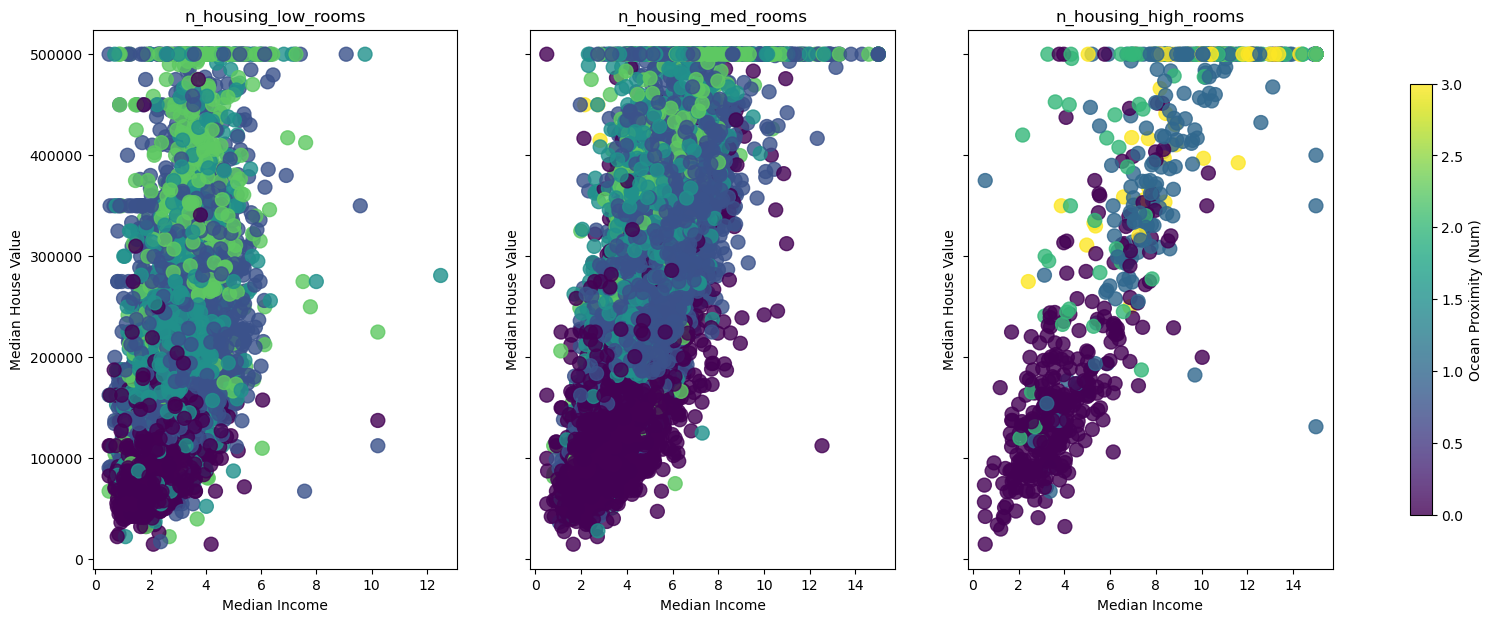

In [37]:
dataframes = [n_housing_low_rooms, n_housing_med_rooms, n_housing_high_rooms]
titles = ["n_housing_low_rooms", "n_housing_med_rooms", "n_housing_high_rooms"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)
for ax, df, title in zip(axes, dataframes, titles):
    scatter = ax.scatter(
        df["median_income"],
        df["median_house_value"],
        c=df["ocean_proximity_num"],
        cmap="viridis",
        s=100,
        alpha=0.8
    )
    ax.set_title(title)
    ax.set_xlabel("Median Income")
    ax.set_ylabel("Median House Value")

cbar = fig.colorbar(scatter, ax=axes, orientation="vertical", shrink=0.8)
cbar.set_label("Ocean Proximity (Num)")

plt.show()

## By checking the correlance matrix - one can see that the correlance between median income and median house value gets higher when average room per household gets higher - and here, ocean proximity still seems to affect price positively.

## Again we don't do anything about low values for average population per household. But what can we learn from looking at the largest values? For our three groups we can see:

In [38]:
print(housing_low_rooms.nlargest(20, "population_per_household")[["population_per_household"]])
print(housing_med_rooms.nlargest(20, "population_per_household")[["population_per_household"]])
print(housing_high_rooms.nlargest(20, "population_per_household")[["population_per_household"]])

       population_per_household
19006                   1243.33
5986                      21.33
20352                     19.31
14756                     18.82
4479                      18.50
19435                     18.44
19524                     16.05
7164                      15.81
15790                     15.60
16643                     13.69
18520                     13.59
4861                      12.40
16594                     12.30
270                       12.23
5985                      12.13
2899                      11.63
1067                      11.30
91                        10.27
7165                       9.90
16733                      9.65
       population_per_household
3364                     599.71
9172                      83.17
12104                     63.75
16420                     51.40
8874                      41.21
13366                     33.95
1039                      17.18
16672                     16.94
20121                     13.21
16171   

## Above we can see that smaller houser (houses with fewer rooms) can have really high average population per households, overall in a higher grade than the other two groups.
### Below we insert some cap limits to population per household - arbitrary choosen values with the logic that the average population per household should be larger for houses with larger amount of rooms. Here we try:
* housing_low_rooms_cap_population - **Limit for average population per 5-room are set to 5**
* housing_med_rooms_cap_population - **Limit for average population per 5-8-room are set to 8**
* housing_high_rooms_cap_population - **Limit for average population per +8-room are set to 10**

### We make new df:s with these restrictions and look if the correlations change:

In [39]:
lims = [5, 8, 10]
housing_low_rooms_cap_population = housing_low_rooms[housing_low_rooms["population_per_household"] <= lims[0]]
housing_med_rooms_cap_population = housing_med_rooms[housing_med_rooms["population_per_household"] <= lims[1]]
housing_high_rooms_cap_population = housing_high_rooms[housing_high_rooms["population_per_household"] <= lims[2]]
print(housing_low_rooms_cap_population.shape)
print(housing_med_rooms_cap_population.shape)
print(housing_high_rooms_cap_population.shape)
print(housing_low_rooms_cap_population.nlargest(5, "population_per_household")[["population_per_household"]])
print(housing_med_rooms_cap_population.nlargest(5, "population_per_household")[["population_per_household"]])
print(housing_high_rooms_cap_population.nlargest(5, "population_per_household")[["population_per_household"]])

(8480, 14)
(11169, 14)
(716, 14)
       population_per_household
4510                       5.00
2876                       4.99
7205                       4.99
3437                       4.98
14755                      4.98
       population_per_household
5531                       7.87
13140                      7.86
12842                      7.76
13982                      7.51
15360                      7.48
       population_per_household
6399                       9.24
17193                      6.89
6226                       6.45
9026                       5.64
11891                      5.42


### The limits above gives:
* 8480 districts with average rooms per house <= 5 and population per household <= 5
* 11.169 districts with average rooms per house in [5, 8] and population per household <= 8
* 716 districts with average rooms per house > 8 and population per household <= 10


In [40]:
print(housing_low_rooms_cap_population.nlargest(5, "rooms_per_household")[["rooms_per_household"]])
print(housing_med_rooms_cap_population.nlargest(5, "rooms_per_household")[["rooms_per_household"]])
print(housing_high_rooms_cap_population.nlargest(5, "rooms_per_household")[["rooms_per_household"]])

      rooms_per_household
253                  5.00
778                  5.00
1200                 5.00
1396                 5.00
1802                 5.00
       rooms_per_household
8878                  8.00
15037                 8.00
13678                 8.00
2226                  7.99
15693                 7.99
       rooms_per_household
12447                62.42
1913                 61.81
11862                59.88
1912                 56.27
9676                 52.85


In [41]:
n_housing_low_rooms_cap_population = housing_low_rooms_cap_population.select_dtypes(include=['number'])
n_housing_med_rooms_cap_population = housing_med_rooms_cap_population.select_dtypes(include=['number'])
n_housing_high_rooms_cap_population = housing_high_rooms_cap_population.select_dtypes(include=['number'])

corr_housing_low_rooms_cap_population = n_housing_low_rooms_cap_population.corr()['median_house_value'].drop('median_house_value')
corr_housing_med_rooms_cap_population = n_housing_med_rooms_cap_population.corr()['median_house_value'].drop('median_house_value')
corr_housing_high_rooms_cap_population = n_housing_high_rooms_cap_population.corr()['median_house_value'].drop('median_house_value')

print(corr_housing_low_rooms_cap_population.sort_values(ascending=True))
print(corr_housing_med_rooms_cap_population.sort_values(ascending=True))
print(corr_housing_high_rooms_cap_population.sort_values(ascending=True))

population_per_household   -0.42
latitude                   -0.09
longitude                  -0.08
rooms_per_household        -0.05
population                 -0.01
bedrooms_per_household      0.04
housing_median_age          0.11
total_rooms                 0.16
households                  0.18
total_bedrooms              0.18
ocean_proximity_num         0.39
median_income               0.53
Name: median_house_value, dtype: float64
population_per_household   -0.23
latitude                   -0.23
bedrooms_per_household     -0.19
population                 -0.02
longitude                  -0.00
total_bedrooms              0.01
households                  0.03
total_rooms                 0.08
housing_median_age          0.18
rooms_per_household         0.38
ocean_proximity_num         0.46
median_income               0.75
Name: median_house_value, dtype: float64
bedrooms_per_household     -0.51
rooms_per_household        -0.35
latitude                   -0.31
total_bedrooms             

### Below we plot these modified df:s in a similar way as above:

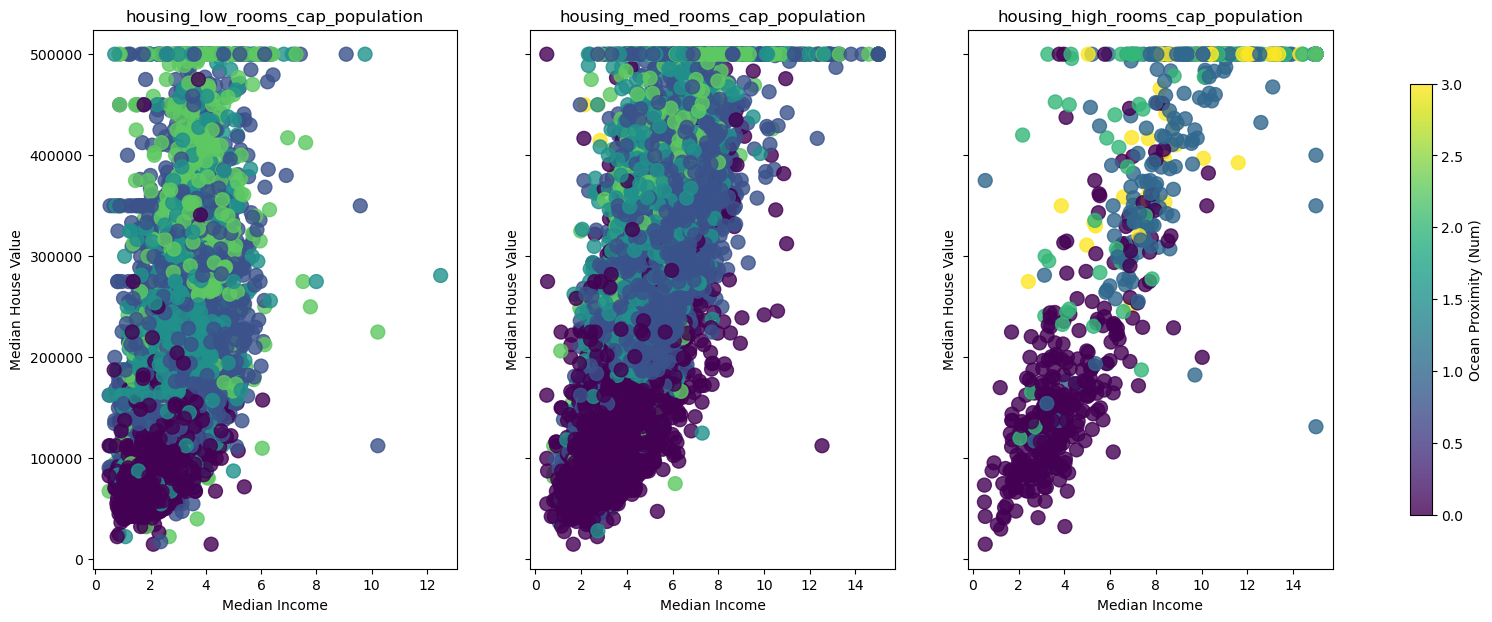

In [42]:
dataframes = [housing_low_rooms_cap_population, housing_med_rooms_cap_population, housing_high_rooms_cap_population]
titles = ["housing_low_rooms_cap_population", "housing_med_rooms_cap_population", "housing_high_rooms_cap_population"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharey=True)

for ax, df, title in zip(axes, dataframes, titles):
    scatter = ax.scatter(
        df["median_income"],
        df["median_house_value"],
        c=df["ocean_proximity_num"],
        cmap="viridis",
        s=100,
        alpha=0.8
    )
    ax.set_title(title)
    ax.set_xlabel("Median Income")
    ax.set_ylabel("Median House Value")

cbar = fig.colorbar(scatter, ax=axes, orientation="vertical", shrink=0.8)
cbar.set_label("Ocean Proximity (Num)")

plt.show()

## As seen above, the correlances here are fairly similar to our previous plots. Surprisingly, setting a cap on average population per house didn't have an effect on the results.

# Conclusions:
### From the analysis performed above I believe I've shown that there is a strong correlance between house value and median income. Ocean proximity also seems to be a good indicator, but from performed analyze it's not significant. 

### I should have been plotted a bit more perhaps to illustrate the results, but in the end all I looked for were correlances.

### The obvious cap-value of 500.000 in house value were in my opinion really bad for this analyze. In the end I included all these high-value houses since they didn't seem to make any difference - but if I would have more time I'm sure I'd find a good way to show that they are bad. Perhaps one could check on the high-percentile of the data and simply extrapolate values, and see what the result would be. BUT - We still don't know which houses are the most expensive, and the "weigh" we get on features when both using a cap value or extrapolate value would still not be good. So in my opinion I would exclude these values.

### I would like to divide the df:s in more groups to investigate further, e.g. it feels wierd to include "70rooms/house median" and similar. 

### Another comment about the conclusion, the analyze above were done without a specific objective or knowledge of the data -  more information about e.g. how the data were collected, should be interpreted etc would be beneficial.

# Självutvärdering
## 1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 
Ja absolut! Datat i sig var väldigt utmanande - i många fall var det svårt att tolka datat. T.ex. då det kommer till att priserna var max 500.000 m.m.
En annan sak som var utmanande var att inte Googla hur andra gjort med detta data-set, utan att själv försöka komma på en approach som faktiskt gynnar mig i mitt lärande. I slutändan, efter större delen av min egen analys kikade jag lite hur andra gjort, t.ex. använt andra bibliotek o.s.v med fina plottar o.s.v. - Valde själv här att ej lägga in denna kod då det känns mer rätt att lämna in något jag helt och fullt förstår.

## 2. Vilket betyg anser du att du ska ha och varför? 
Jag tror att mitt sätt att resonera kring datat, testa att dela upp datat i olika grupper o.s.v. är i VG-klassen, medan min struktur i arbetet kanske är av lägre kvalitét.

Men på det stora hela tycker jag att jag presterade bra på det som var som mest utmanande - försök att skapa förståelse för datat.

Hade gärna lagt mer fokus på att skapa fina och illustrativa plottar, men lade 99% fokus på att bolla runt med datat och sikta på logiska och intuitiva indelningar av datat, vilket jag tycker jag till viss del lyckades väl med.

## 3. Något du vill lyfta fram till Antonio? 

Kul uppgift - Hade varit roligt att idag på föreläsningen fått höra lite mer bakgrund kring detta case.